In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Hide

In [196]:
df_sale10 = pd.read_excel('fretailer.xlsx', sheet_name='10.SE Regional Sales')
df_sale11 = pd.read_excel('fretailer.xlsx', sheet_name='11.SE Regional Sales')
df_sale12 = pd.read_excel('fretailer.xlsx', sheet_name='12.SE Regional Sales')
df_customer = pd.read_excel('fretailer.xlsx', sheet_name='Customer')

In [197]:
print(df_sale10.duplicated().sum())
print(df_sale11.duplicated().sum())
print(df_sale12.duplicated().sum())
print(df_customer.duplicated().sum())

0
0
0
0


In [198]:
print(df_sale10['Customer ID'].duplicated().sum())
print(df_sale11['Customer ID'].duplicated().sum())
print(df_sale12['Customer ID'].duplicated().sum())
print(df_customer['Customer ID'].duplicated().sum())

2
2
2
2


In [199]:
print(df_sale10.loc[:, df_sale10.columns != 'Return Reason'].isnull().sum())
print(df_sale11.loc[:, df_sale10.columns != 'Return Reason'].isnull().sum())
print(df_sale12.loc[:, df_sale10.columns != 'Return Reason'].isnull().sum())
print(df_customer.isnull().sum())

Order ID                0
Customer Last Name      0
Customer First Name     0
Customer ID             0
Product Category        0
Order Date              0
Quantity Ordered        0
Order Status            0
State                   0
Manufacturer Price      0
Sale Price              0
Total Profit (GMROI)    0
Sales Agent             0
dtype: int64
Order ID                0
Customer Last Name      0
Customer First Name     0
Customer ID             0
Product Category        0
Order Date              0
Quantity Ordered        0
Order Status            0
State                   0
Manufacturer Price      0
Sale Price              0
Total Profit (GMROI)    0
Sales Agent             0
dtype: int64
Order ID                0
Customer Last Name      0
Customer First Name     0
Customer ID             0
Product Category        0
Order Date              0
Quantity Ordered        0
Order Status            0
State                   0
Manufacturer Price      0
Sale Price              0
Total Profit

In [200]:
print(df_sale10['Sale Price'])
print(df_customer.isnull().sum())

0      1880
1      1602
2       891
3      1462
4       525
       ... 
995     955
996     282
997     576
998     307
999    1033
Name: Sale Price, Length: 1000, dtype: int64
Customer Last Name     0
Customer First Name    0
Customer ID            0
Product Category       0
Order Date             0
Quantity Ordered       0
Order Status           0
State                  0
Address                0
City                   0
Postal Code            0
Sale Price             0
Phone                  0
dtype: int64


In [201]:
# data.rename(columns={
#     'Order ID ': 'order_id',
#     'Gender': 'gender',
#     'Education Level': 'edu', 
#     'Job Title': 'job',
#     'Years of Experience':'exp', 
#     'Salary': 'salary'}, inplace=True)
# data.info()
df_sale10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              1000 non-null   int64         
 1   Customer Last Name    1000 non-null   object        
 2   Customer First Name   1000 non-null   object        
 3   Customer ID           1000 non-null   int64         
 4   Product Category      1000 non-null   object        
 5   Order Date            1000 non-null   datetime64[ns]
 6   Quantity Ordered      1000 non-null   int64         
 7   Order Status          1000 non-null   object        
 8   State                 1000 non-null   object        
 9   Manufacturer Price    1000 non-null   int64         
 10  Sale Price            1000 non-null   int64         
 11  Total Profit (GMROI)  1000 non-null   int64         
 12  Sales Agent           1000 non-null   object        
 13  Return Reason      

#### Read

In [202]:
base_path = 'Target/'
dim_city = pd.read_csv(base_path + 'DimCity.csv')
dim_customer = pd.read_csv(base_path + 'DimCustomer.csv')
dim_date = pd.read_csv(base_path + 'DimDate.csv')
dim_product_catalog = pd.read_csv(base_path + 'DimProduct.csv')
dim_return_reason = pd.read_csv(base_path + 'DimReturnReason.csv')
dim_sales_agent = pd.read_csv(base_path + 'DimSalesAgent.csv')
dim_state = pd.read_csv(base_path + 'DimState.csv')
dim_order_status = pd.read_csv(base_path + 'DimOrderStatus.csv')
fact_order = pd.read_csv(base_path + 'FactOrder.csv')
dim_order_status

,OrderStatusKey,OrderStatusName
0,1,Delivered
1,2,Shipped
2,3,Cancelled
3,4,In Transit


#### Preprocessing
- Drop na
- Standardize education, gender cols
- Rename cols for easier work

In [203]:
# data.rename(columns={
#     'Age': 'age',
#     'Gender': 'gender',
#     'Education Level': 'edu', 
#     'Job Title': 'job',
#     'Years of Experience':'exp', 
#     'Salary': 'salary'}, inplace=True)
# data.info()

In [204]:
# print(data.isna().sum())
# data.dropna(inplace=True)


In [205]:
# #normalize job titles and education levels
# data['gender'] = data['gender'].str.lower().str.strip()
# data['job'] = data['job'].str.lower().str.strip()
# data['edu'] = data['edu'].str.lower().str.strip()
# data['edu'].replace(
#     {"bachelor's": "bachelor", 
#      "master's": "master", 
#      "bachelor's degree": "bachelor",
#      "master's degree": "master"}, 
# inplace=True)

#### Define Functions

In [206]:
class ColumnNames(enumerate):
    StateKey = 'StateKey'
    StateName = 'State'
    ReturnReasonKey = 'ReturnReasonKey'
    ReturnReasonName = 'ReturnReasonName'
    SaleAgentName = 'SaleAgentName'
    SaleAgentKey = 'SaleAgentKey'
    ProductCatalogKey = 'ProductCatalogKey'
    ProductCatalogName = 'ProductCatalogName'
    DateKey = 'DateKey'
    Date = 'Date'
    Day = 'Day'
    Month = 'Month'
    WeekDayName = 'WeekDayName'
    CityKey = 'CityKey'
    CityName = 'CityName'
    CustomerKey = 'CustomerKey'
    CustomerFName = 'Customer First Name'
    CustomerLName = 'Customer Last Name'
    CustomerPhone = 'Phone'
    OrderStatusKey = 'OrderStatusKey'
    OrderStatusName = 'OrderStatusName'
    OrderID = 'OrderID'
    OrderDate = 'OrderDate'
    QuantityOrdered = 'Quantity Ordered'
    ManufacturerPrice = 'Manufacturer Price'
    SalePrice = 'Sale Price'
    ProfitPerUnit = 'Total Profit (GMROI)'
    ProfitPerOrder = 'Profit Per Order'

In [207]:
def get_fact_view(fact_df: pd.DataFrame, key_columns_names: list[ColumnNames]):
    fact_view = fact_df.copy()
    if ColumnNames.DateKey in key_columns_names:
        fact_view = fact_view.join(dim_date.set_index(ColumnNames.DateKey), on=ColumnNames.DateKey)
    if ColumnNames.CustomerKey in key_columns_names:
        fact_view = fact_view.join(dim_customer.set_index(ColumnNames.CustomerKey), on=ColumnNames.CustomerKey)
    if ColumnNames.CityKey in key_columns_names:
        fact_view = fact_view.join(dim_city[[ColumnNames.CityKey, ColumnNames.CityName]].set_index(ColumnNames.CityKey), on=ColumnNames.CityKey)
    if ColumnNames.StateKey in key_columns_names:
        fact_view = fact_view.join(dim_state.set_index(ColumnNames.StateKey), on=ColumnNames.StateKey)
    if ColumnNames.SaleAgentKey in key_columns_names:
        fact_view = fact_view.join(dim_sales_agent.set_index(ColumnNames.SaleAgentKey), on=ColumnNames.SaleAgentKey)
    if ColumnNames.ProductCatalogKey in key_columns_names:
        fact_view = fact_view.join(dim_product_catalog.set_index(ColumnNames.ProductCatalogKey), on=ColumnNames.ProductCatalogKey)
    if ColumnNames.ReturnReasonKey in key_columns_names:
        fact_view = fact_view.join(dim_return_reason.set_index(ColumnNames.ReturnReasonKey), on=ColumnNames.ReturnReasonKey)
    if ColumnNames.OrderStatusKey in key_columns_names:
        fact_view = fact_view.join(dim_order_status.set_index(ColumnNames.OrderStatusKey), on=ColumnNames.OrderStatusKey)
    #remove key columns 
    for col in key_columns_names:
        fact_view.drop(col, axis=1, inplace=True)
    
    return fact_view

In [208]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def anova_pairwise_tukeyhsd(df, col1: str, col2: str, no_plot=False):
    # colname cannot have white space
    df_temp = df.copy()
    col1_replaced = col1.replace(' ', '').replace('(', '').replace(')', '')
    col2_replaced = col2.replace(' ', '').replace('(', '').replace(')', '')
    df_temp.rename(columns={col1: col1_replaced, col2: col2_replaced}, inplace=True)
    print(f'ANOVA for {col1_replaced} and {col2_replaced}')
    if not no_plot:
        fig = plt.figure(figsize=(4, 2))
        ax1 = fig.add_subplot(1, 1, 1)
        sns.boxplot(x=col1_replaced, y=col2_replaced, data=df_temp, palette="Set3", ax=ax1)
        plt.show()

    model = ols(f'{col2_replaced} ~ C({col1_replaced})', data=df_temp).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    #only print anova have p-value < 0.35
    print(anova_table)
    print('\n')
    m_comp = pairwise_tukeyhsd(endog=df_temp[col2_replaced], groups=df_temp[col1_replaced], alpha=0.05)
    print(m_comp)

In [209]:
from scipy.stats import chi2_contingency, chi2
def plot_crosstab_and_show_dependency(df, col1, col2, no_plot=False):
    crosstab = pd.crosstab(df[col1], df[col2])
    col1 = str(col1)
    col2 = str(col2)
    if not no_plot:
        crosstab.plot(kind='bar', stacked=True, figsize=(5, 3))
        plt.title(f'{col1} vs {col2}')
        plt.show()

    stat, p, dof, expected =chi2_contingency(crosstab)
    print(f'p-value: {p}')
    print(f'dof: {dof}')

    prob = 0.975
    critical = chi2.ppf(prob, dof)
    print(f'probability: {prob}, critical: {critical}, stat: {stat}')

    alpha = 1 - prob
    print(f'alpha (significant): {alpha}, p-value: {p}')
    if p <= alpha:
        print(f'{col1} dependent {col2} (reject H0)')
    else:
        print(f'{col1} independent {col2}(fail to reject H0)')

In [210]:
def num_univariate_analysis(data, col: str, plot_only=False, no_outlier_analysis=False):
    #Descriptive statistics
    col_median = data[col].median()
    col_mode = data[col].mode().iloc[0]
    col_range = data[col].max() - data[col].min()
    col_variance = data[col].var()
    col_skew = data[col].skew()
    col_kurt = data[col].kurt()

    if not plot_only:
        print(data[col].describe(include='all'))
        print(f"Median {col_median}")
        print(f"Mode {col_mode}")
        print(f"Range {col_range}")
        print(f"Var {col_variance}")
        print("****************************************************")

    # Histogram
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    # plt.subplot(1, 3, 2)
    # plt.hist(data[col])
    if data[col].nunique() < 10:
        plt.subplot(1, 2, 2)   
        plt.pie(data[col].value_counts(), labels=data[col].value_counts().index, autopct='%1.1f%%')
    plt.show()
    print(f"Skew {col_skew}")
    print(f"Kurt {col_kurt}")
    if col_skew > 0:
        print("Phân phối lệch phải")
    else:
        print("Phân phối lệch trái")
    
    if col_kurt > 0:
        print("Phân phối nhọn hơn phân phối chuẩn")
    else:
        print("Phân phối có độ nhọn thấp hơn phân phối chuẩn")
    print("****************************************************")

    if no_outlier_analysis:
        return
    col_Q1 = data[col].quantile(0.25)
    col_Q3 = data[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1
    
    if not plot_only:
        print(f"Q1 - Q3: {col_Q1} - {col_Q3}")
        print(f"IQR {col_IQR}")

    # Boxplot, Outliers
    plt.figure(figsize=(2,2))
    plt.boxplot(data[col])
    plt.show()
    col_outliers_upper_num = data[data[col] > (col_Q3 + 1.5*col_IQR)].shape[0]
    col_outliers_lower_num = data[data[col] < (col_Q1 - 1.5*col_IQR)].shape[0]
    col_outliers_per = (col_outliers_upper_num + col_outliers_lower_num)/data.shape[0] * 100
    print(f"Number of outliers: {col_outliers_upper_num + col_outliers_lower_num}")
    print(f"Number of upper outliers: {col_outliers_upper_num}")
    print(f"Number of lower outliers: {col_outliers_lower_num}")
    print(f"Percentage of outliers: {col_outliers_per}%")
    # vì outlier có tỉ lệ nhỏ (<1%) nên có thể không cần loại bỏ outlier

In [211]:
class PlotType(enumerate):
    HIST = 'hist'
    PIE = 'pie'
    BAR = 'bar'

def cat_univariate_analysis(data:pd.DataFrame, fig_size=(10, 5), exclude_cols=[], num_cols=3, plot_type=PlotType.HIST):
    i = 0
    category_cols = [col for col in data.columns if data[col].dtype == 'object']
    num_rows = len(category_cols) // num_cols + 1
    fig = plt.figure(figsize=fig_size)
    for col in category_cols:
        if col in exclude_cols:
            continue
        i += 1
        fig.add_subplot(num_rows, num_cols, i)
        if plot_type == PlotType.HIST:
            sns.histplot(data[col])
        elif plot_type == PlotType.PIE:
            plt.pie(data[col].value_counts(), labels=data[col].value_counts().index, autopct='%1.1f%%')
        elif plot_type == PlotType.BAR:
            sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts())
        plt.xticks(rotation=90)
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [212]:
# numbers_cols = [col for col in data.columns if data[col].dtype != 'object']
# description = data.describe()
# modes = data.mode().iloc[0] # (1,33)
# description.loc['mode'] = modes
# description.loc['var'] = data[numbers_cols].var()
# standard_error = data[numbers_cols].sem()
# description.loc['std'] = standard_error
# kurtosis = data[numbers_cols].kurtosis()
# description.loc['kur'] = kurtosis
# skewness = data[numbers_cols].skew()
# description.loc['skew'] = skewness
# range = data[numbers_cols].max() - data[numbers_cols].min()
# description.loc['range'] = range
# description

#### Descriptive Analysis

In [213]:
# num_univariate_analysis(fact_order, ColumnNames.SalePrice)


fact_view = get_fact_view(fact_order, [ColumnNames.DateKey, ColumnNames.CustomerKey, ColumnNames.CityKey, ColumnNames.StateKey, ColumnNames.SaleAgentKey, ColumnNames.ProductCatalogKey, ColumnNames.ReturnReasonKey, ColumnNames.OrderStatusKey])
#fact_view = get_fact_view(fact_order, [ColumnNames.DateKey, ColumnNames.CustomerKey, ColumnNames.StateKey, ColumnNames.SaleAgentKey, ColumnNames.ProductCatalogKey, ColumnNames.ReturnReasonKey, ColumnNames.OrderStatusKey])
fact_view.info()
fact_view.rename(columns={'Order ID': ColumnNames.OrderID}, inplace=True)
fact_view[ColumnNames.ProfitPerOrder] = fact_view[ColumnNames.QuantityOrdered] * fact_view[ColumnNames.ProfitPerUnit]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Order ID              3000 non-null   int64 
 1   Quantity Ordered      3000 non-null   int64 
 2   Manufacturer Price    3000 non-null   int64 
 3   Sale Price            3000 non-null   int64 
 4   Total Profit (GMROI)  3000 non-null   int64 
 5   Date                  3000 non-null   object
 6   Month                 3000 non-null   int64 
 7   Day                   3000 non-null   int64 
 8   WeekDayName           3000 non-null   object
 9   Customer Last Name    3000 non-null   object
 10  Customer First Name   3000 non-null   object
 11  Phone                 3000 non-null   object
 12  CityName              3000 non-null   object
 13  State                 3000 non-null   object
 14  SaleAgentName         3000 non-null   object
 15  ProductCatalogName    3000 non-null   

In [214]:
# num_univariate_analysis(fact_view, ColumnNames.SalePrice)
product_catalog_names = fact_view[ColumnNames.ProductCatalogName].unique()
# create a dataframe of mean, min, max, quantiles, median, mode, of different ProductCatalogName
product_catalog_summary = fact_view.groupby(ColumnNames.ProductCatalogName).agg(
    mean_sale_price = (ColumnNames.SalePrice, 'mean'),
    min_sale_price = (ColumnNames.SalePrice, 'min'),
    max_sale_price = (ColumnNames.SalePrice, 'max'),
    q1_sale_price = (ColumnNames.SalePrice, lambda x: x.quantile(0.25)),
    q3_sale_price = (ColumnNames.SalePrice, lambda x: x.quantile(0.75)),
    median_sale_price = (ColumnNames.SalePrice, 'median'),
    mode_sale_price = (ColumnNames.SalePrice, lambda x: x.mode().iloc[0]),
    mean_manufacturer_price = (ColumnNames.ManufacturerPrice, 'mean'),
    min_manufacturer_price = (ColumnNames.ManufacturerPrice, 'min'),
    max_manufacturer_price = (ColumnNames.ManufacturerPrice, 'max'),
    q1_manufacturer_price = (ColumnNames.ManufacturerPrice, lambda x: x.quantile(0.25)),
    q2_manufacturer_price = (ColumnNames.ManufacturerPrice, lambda x: x.quantile(0.75)),
    median_manufacturer_price = (ColumnNames.ManufacturerPrice, 'median'),
    mode_manufacturer_price = (ColumnNames.ManufacturerPrice, lambda x: x.mode().iloc[0]),
)

##### Descriptive statistics for product catalogs

Product Catalog Name: Clothing
count     456.000000
mean      749.945175
std       441.617217
min        10.000000
25%       363.750000
50%       727.500000
75%      1156.250000
max      1500.000000
Name: Manufacturer Price, dtype: float64
Median 727.5
Mode 250
Range 1490
Var 195025.7662184307
****************************************************


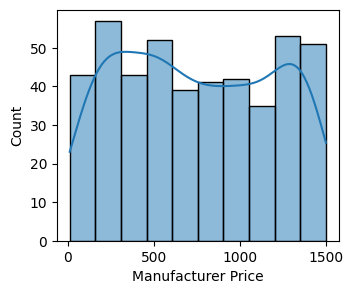

Skew 0.06232640120588218
Kurt -1.2863654385644532
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Home & Kitchen
count     420.000000
mean      720.833333
std       438.910314
min        10.000000
25%       318.750000
50%       705.000000
75%      1115.000000
max      1490.000000
Name: Manufacturer Price, dtype: float64
Median 705.0
Mode 425
Range 1480
Var 192642.26332537792
****************************************************


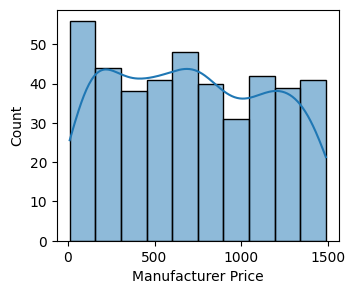

Skew 0.09963553497486391
Kurt -1.2094391689605728
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Sports & Outdoors
count     390.000000
mean      769.102564
std       434.026067
min        10.000000
25%       381.250000
50%       762.500000
75%      1163.750000
max      1500.000000
Name: Manufacturer Price, dtype: float64
Median 762.5
Mode 510
Range 1490
Var 188378.62698569638
****************************************************


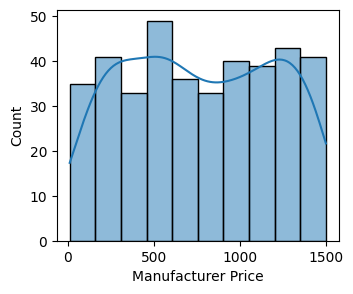

Skew 0.015145160175670792
Kurt -1.252227087981121
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Pets
count     405.000000
mean      732.234568
std       436.723860
min        10.000000
25%       335.000000
50%       715.000000
75%      1100.000000
max      1500.000000
Name: Manufacturer Price, dtype: float64
Median 715.0
Mode 315
Range 1490
Var 190727.72949517175
****************************************************


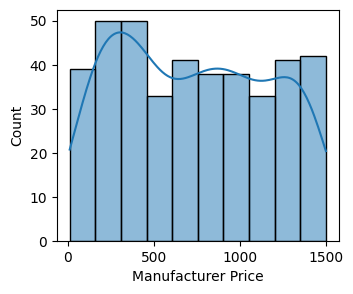

Skew 0.10902450831479028
Kurt -1.2589289841190325
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Electronics
count     474.000000
mean      750.358650
std       421.291779
min        15.000000
25%       411.250000
50%       755.000000
75%      1102.500000
max      1500.000000
Name: Manufacturer Price, dtype: float64
Median 755.0
Mode 105
Range 1485
Var 177486.76327597434
****************************************************


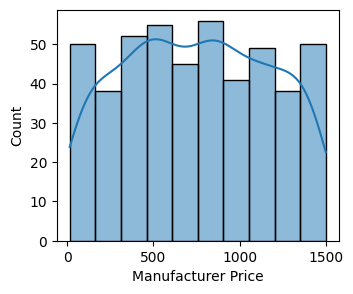

Skew 0.012288202470567323
Kurt -1.133244013205496
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Personal Care
count     450.000000
mean      738.022222
std       421.839064
min        15.000000
25%       375.000000
50%       742.500000
75%      1070.000000
max      1495.000000
Name: Manufacturer Price, dtype: float64
Median 742.5
Mode 230
Range 1480
Var 177948.19549616432
****************************************************


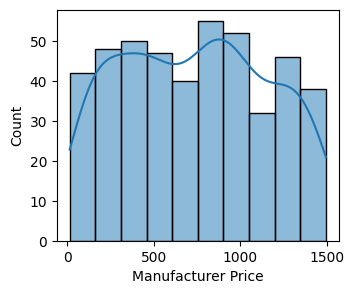

Skew 0.05938313565474227
Kurt -1.1460269121382445
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Books
count     405.000000
mean      801.012346
std       414.611189
min        15.000000
25%       465.000000
50%       840.000000
75%      1145.000000
max      1500.000000
Name: Manufacturer Price, dtype: float64
Median 840.0
Mode 145
Range 1485
Var 171902.43796601883
****************************************************


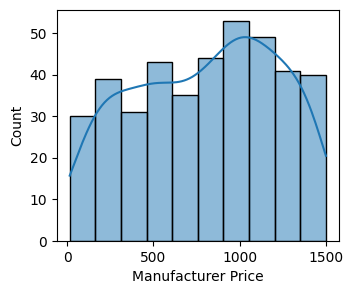

Skew -0.15288892197784038
Kurt -1.1262260170918403
Phân phối lệch trái
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************


In [215]:
for product_catalog_name in product_catalog_names:
    print(f"Product Catalog Name: {product_catalog_name}")
    num_univariate_analysis(fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_name], ColumnNames.ManufacturerPrice, no_outlier_analysis=True)

Product Catalog Name: Clothing
count     456.000000
mean      898.912281
std       529.819933
min        11.000000
25%       428.500000
50%       862.500000
75%      1384.250000
max      1903.000000
Name: Sale Price, dtype: float64
Median 862.5
Mode 814
Range 1892
Var 280709.16151918255
****************************************************


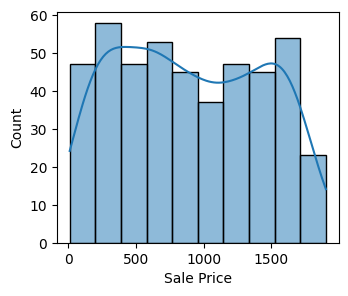

Skew 0.08426264048437024
Kurt -1.238759090096805
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Home & Kitchen
count     420.000000
mean      866.607143
std       530.378314
min        11.000000
25%       382.750000
50%       849.000000
75%      1343.750000
max      1904.000000
Name: Sale Price, dtype: float64
Median 849.0
Mode 169
Range 1893
Var 281301.15555744973
****************************************************


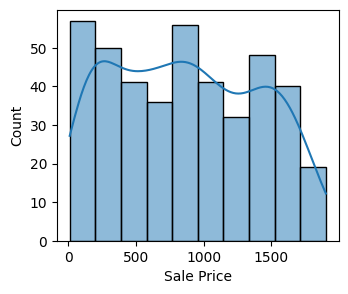

Skew 0.12132222551880908
Kurt -1.1752662479874159
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Sports & Outdoors
count     390.000000
mean      928.387179
std       529.174102
min        11.000000
25%       467.750000
50%       908.000000
75%      1412.250000
max      1916.000000
Name: Sale Price, dtype: float64
Median 908.0
Mode 1297
Range 1905
Var 280025.23016940214
****************************************************


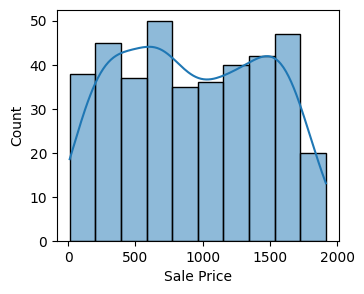

Skew 0.04757684656544901
Kurt -1.2218272113592943
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Pets
count     405.000000
mean      881.086420
std       531.093002
min        12.000000
25%       396.000000
50%       848.000000
75%      1333.000000
max      1935.000000
Name: Sale Price, dtype: float64
Median 848.0
Mode 1059
Range 1923
Var 282059.7771666056
****************************************************


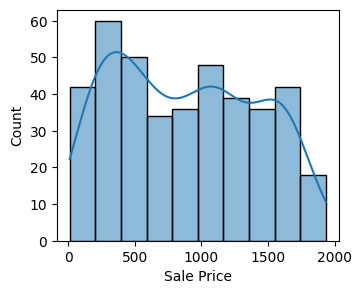

Skew 0.1478971958121382
Kurt -1.223550608703107
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Electronics
count     474.000000
mean      897.291139
std       504.200084
min        17.000000
25%       480.250000
50%       883.500000
75%      1314.750000
max      1908.000000
Name: Sale Price, dtype: float64
Median 883.5
Mode 993
Range 1891
Var 254217.72478390022
****************************************************


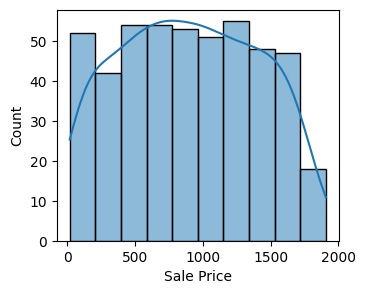

Skew 0.024876244501093124
Kurt -1.0970695780545208
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Personal Care
count     450.000000
mean      884.324444
std       511.170304
min        17.000000
25%       442.750000
50%       888.500000
75%      1297.000000
max      1864.000000
Name: Sale Price, dtype: float64
Median 888.5
Mode 526
Range 1847
Var 261295.0793565949
****************************************************


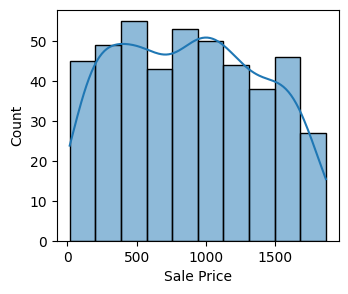

Skew 0.09640657638031874
Kurt -1.1231833371580646
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Books
count     405.000000
mean      959.683951
std       496.763753
min        16.000000
25%       551.000000
50%      1015.000000
75%      1386.000000
max      1823.000000
Name: Sale Price, dtype: float64
Median 1015.0
Mode 1433
Range 1807
Var 246774.22659821535
****************************************************


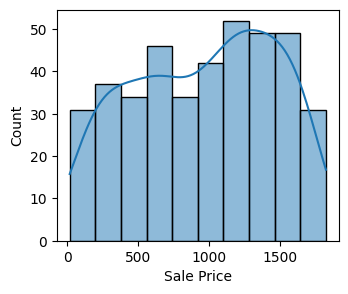

Skew -0.16643616828892585
Kurt -1.150835923444931
Phân phối lệch trái
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************


In [216]:
for product_catalog_name in product_catalog_names:
    print(f"Product Catalog Name: {product_catalog_name}")
    num_univariate_analysis(fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_name], ColumnNames.SalePrice, no_outlier_analysis=True)

Product Catalog Name: Clothing
count    456.000000
mean     148.967105
std       99.528741
min        1.000000
25%       71.000000
50%      134.000000
75%      216.250000
max      438.000000
Name: Total Profit (GMROI), dtype: float64
Median 134.0
Mode 159
Range 437
Var 9905.970344129555
****************************************************


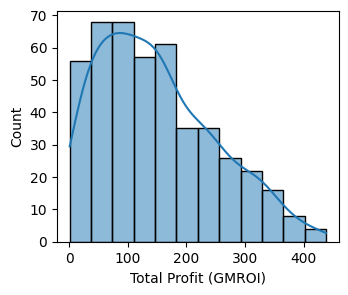

Skew 0.634632194155721
Kurt -0.3214095173739886
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Home & Kitchen
count    420.000000
mean     145.773810
std      102.144634
min        1.000000
25%       62.750000
50%      131.000000
75%      205.250000
max      419.000000
Name: Total Profit (GMROI), dtype: float64
Median 131.0
Mode 19
Range 418
Var 10433.526281395614
****************************************************


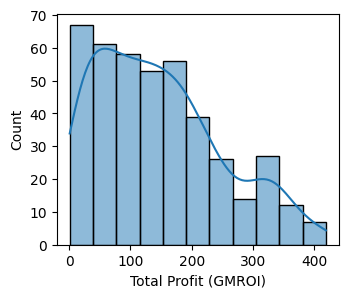

Skew 0.6418232392827625
Kurt -0.38770732935784347
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Sports & Outdoors
count    390.000000
mean     159.284615
std      105.744629
min        1.000000
25%       74.250000
50%      142.500000
75%      237.500000
max      441.000000
Name: Total Profit (GMROI), dtype: float64
Median 142.5
Mode 84
Range 440
Var 11181.92649792367
****************************************************


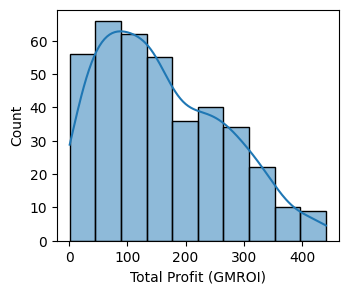

Skew 0.5536469533883478
Kurt -0.5429811972606435
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Pets
count    405.000000
mean     148.851852
std      104.419175
min        2.000000
25%       57.000000
50%      124.000000
75%      222.000000
max      440.000000
Name: Total Profit (GMROI), dtype: float64
Median 124.0
Mode 39
Range 438
Var 10903.364136413638
****************************************************


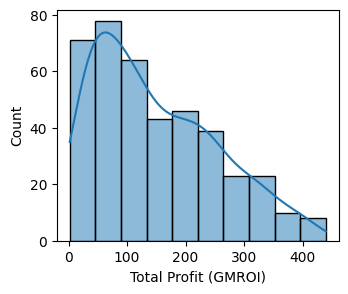

Skew 0.6516175261549619
Kurt -0.4984259284390764
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Electronics
count    474.000000
mean     146.932489
std       94.585687
min        2.000000
25%       73.000000
50%      137.500000
75%      208.000000
max      423.000000
Name: Total Profit (GMROI), dtype: float64
Median 137.5
Mode 133
Range 421
Var 8946.452092309615
****************************************************


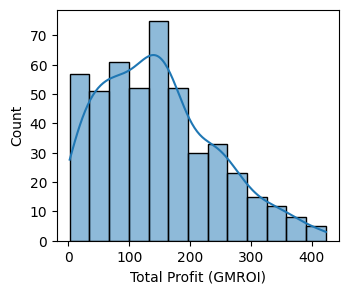

Skew 0.599140909929549
Kurt -0.18565373057115586
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Personal Care
count    450.000000
mean     146.302222
std      100.265048
min        2.000000
25%       61.250000
50%      130.500000
75%      212.750000
max      429.000000
Name: Total Profit (GMROI), dtype: float64
Median 130.5
Mode 97
Range 427
Var 10053.079950507301
****************************************************


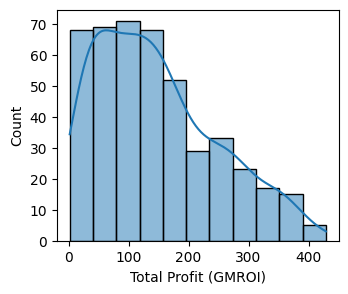

Skew 0.6628688612673356
Kurt -0.3876378366100659
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Books
count    405.000000
mean     158.671605
std       94.201087
min        1.000000
25%       79.000000
50%      152.000000
75%      234.000000
max      387.000000
Name: Total Profit (GMROI), dtype: float64
Median 152.0
Mode 93
Range 386
Var 8873.84486004156
****************************************************


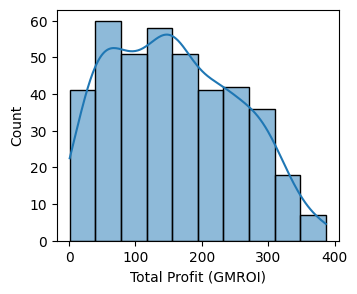

Skew 0.2742011660822234
Kurt -0.8658348638904387
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************


In [217]:
for product_catalog_name in product_catalog_names:
    print(f"Product Catalog Name: {product_catalog_name}")
    num_univariate_analysis(fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_name], ColumnNames.ProfitPerUnit, no_outlier_analysis=True)

Product Catalog Name: Clothing
count    456.000000
mean      10.300439
std        5.676216
min        1.000000
25%        5.000000
50%       11.000000
75%       15.000000
max       20.000000
Name: Quantity Ordered, dtype: float64
Median 11.0
Mode 11
Range 19
Var 32.2194283786389
****************************************************


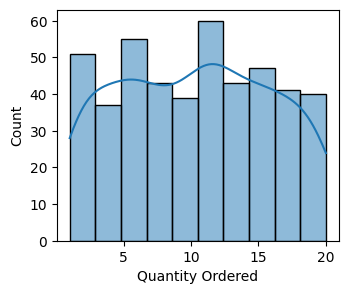

Skew 0.019740966163065407
Kurt -1.1521322426999518
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Home & Kitchen
count    420.000000
mean      10.619048
std        5.944663
min        1.000000
25%        5.000000
50%       11.000000
75%       16.000000
max       20.000000
Name: Quantity Ordered, dtype: float64
Median 11.0
Mode 13
Range 19
Var 35.33901579724969
****************************************************


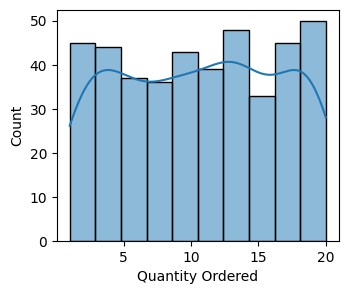

Skew -0.027286959192944393
Kurt -1.2434150421641579
Phân phối lệch trái
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Sports & Outdoors
count    390.000000
mean      10.425641
std        5.772318
min        1.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Quantity Ordered, dtype: float64
Median 10.0
Mode 7
Range 19
Var 33.31964933096038
****************************************************


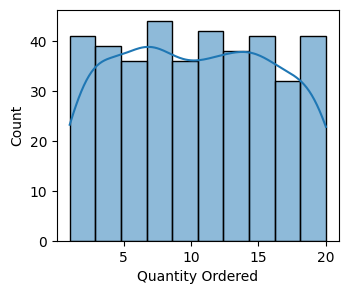

Skew 0.035888325636648316
Kurt -1.1972520881847755
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Pets
count    405.000000
mean      10.358025
std        5.797551
min        1.000000
25%        5.000000
50%       11.000000
75%       15.000000
max       20.000000
Name: Quantity Ordered, dtype: float64
Median 11.0
Mode 17
Range 19
Var 33.61160004889378
****************************************************


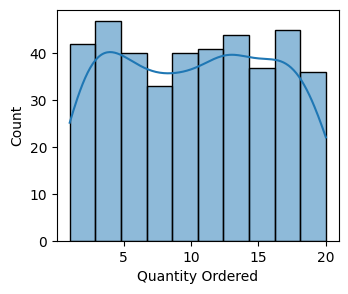

Skew 0.009286441186414841
Kurt -1.2413988688589037
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Electronics
count    474.000000
mean      10.603376
std        5.769614
min        1.000000
25%        6.000000
50%       11.000000
75%       15.000000
max       20.000000
Name: Quantity Ordered, dtype: float64
Median 11.0
Mode 9
Range 19
Var 33.28844524134486
****************************************************


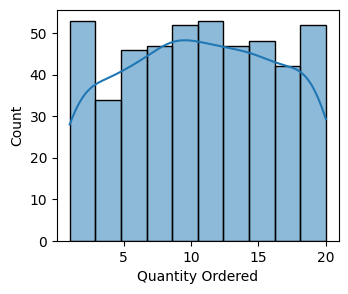

Skew -0.027451945148328896
Kurt -1.1354071978030553
Phân phối lệch trái
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Personal Care
count    450.000000
mean      10.784444
std        5.884957
min        1.000000
25%        6.000000
50%       11.000000
75%       16.000000
max       20.000000
Name: Quantity Ordered, dtype: float64
Median 11.0
Mode 12
Range 19
Var 34.632719623855486
****************************************************


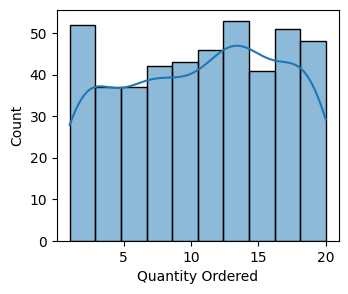

Skew -0.1024397959649778
Kurt -1.1965129244621764
Phân phối lệch trái
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************
Product Catalog Name: Books
count    405.000000
mean      10.402469
std        5.673762
min        1.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Quantity Ordered, dtype: float64
Median 10.0
Mode 8
Range 19
Var 32.191578046693564
****************************************************


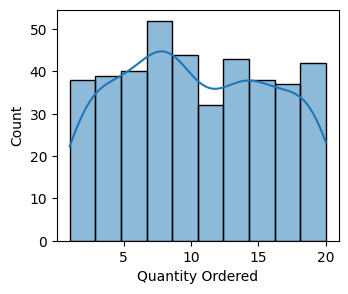

Skew 0.06615967861671715
Kurt -1.1727333111294787
Phân phối lệch phải
Phân phối có độ nhọn thấp hơn phân phối chuẩn
****************************************************


In [218]:
for product_catalog_name in product_catalog_names:
    print(f"Product Catalog Name: {product_catalog_name}")
    num_univariate_analysis(fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_name], ColumnNames.QuantityOrdered, no_outlier_analysis=True)

##### Plot means values of columns prices for each product catalog

<AxesSubplot: xlabel='ProductCatalogName'>

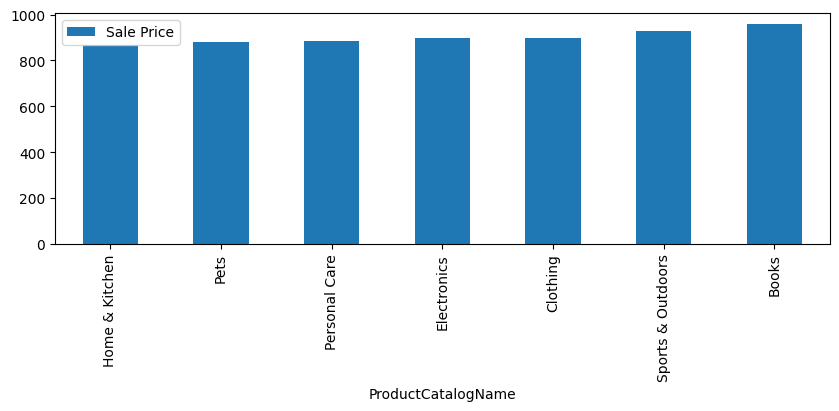

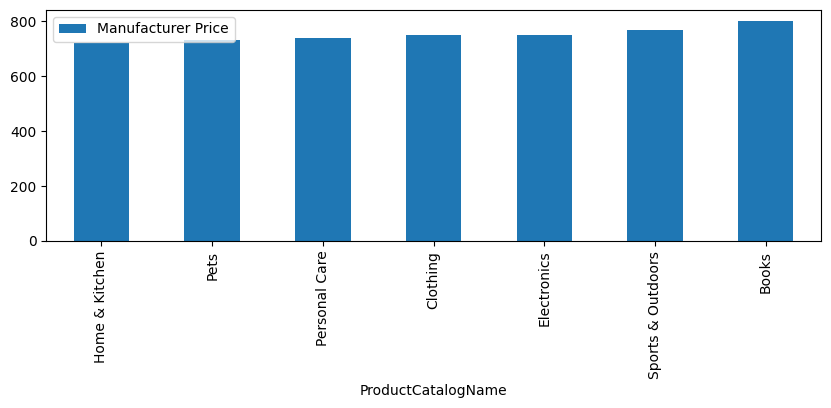

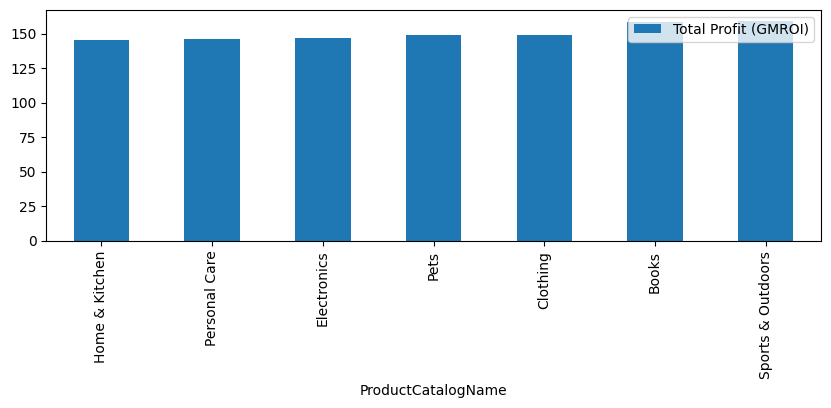

In [219]:
# get mean value of column of each product catalog
product_catalog_sale_price_mean = fact_view.groupby(ColumnNames.ProductCatalogName)[[ColumnNames.SalePrice]].mean()
product_catalog_sale_price_mean.sort_values(by=ColumnNames.SalePrice, ascending=True, inplace=True)
product_catalog_sale_price_mean.plot(kind='bar', figsize=(10, 3))

product_catalog_manu_price_mean = fact_view.groupby(ColumnNames.ProductCatalogName)[[ColumnNames.ManufacturerPrice]].mean()
product_catalog_manu_price_mean.sort_values(by=ColumnNames.ManufacturerPrice, ascending=True, inplace=True)
product_catalog_manu_price_mean.plot(kind='bar', figsize=(10, 3))

product_catalog_profit_unit_mean = fact_view.groupby(ColumnNames.ProductCatalogName)[[ColumnNames.ProfitPerUnit]].mean()
product_catalog_profit_unit_mean.sort_values(by=ColumnNames.ProfitPerUnit, ascending=True, inplace=True)
product_catalog_profit_unit_mean.plot(kind='bar', figsize=(10, 3))



mean thì không khác nhưng sum thì khác

In [220]:
# t- test quantity ordered mean of product catalogs
from scipy.stats import ttest_ind
product_catalogs = fact_view[ColumnNames.ProductCatalogName].unique()
for i in range(len(product_catalogs)):
    for j in range(i+1, len(product_catalogs)):
        product_catalog_i = product_catalogs[i]
        product_catalog_j = product_catalogs[j]
        # mean of quantity ordered of product catalog i and j
        mean_quantity_ordered_i = fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_i][ColumnNames.QuantityOrdered].mean()
        mean_quantity_ordered_j = fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_j][ColumnNames.QuantityOrdered].mean()
        print(f"Product Catalog {product_catalog_i}: {mean_quantity_ordered_i} vs {product_catalog_j}: {mean_quantity_ordered_j}")
        t_stat, p_val = ttest_ind(fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_i][ColumnNames.QuantityOrdered], 
                                  fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_j][ColumnNames.QuantityOrdered])
        print(f"t-statistic: {t_stat}, p-value: {p_val}")
        if p_val < 0.05:
            print(f"Reject H0: {product_catalog_i} and {product_catalog_j} have different mean quantity ordered")
        else:
            print(f"Fail to reject H0: {product_catalog_i} and {product_catalog_j} have same mean quantity ordered")
        print("****************************************************")

Product Catalog Clothing: 10.300438596491228 vs Home & Kitchen: 10.619047619047619
t-statistic: -0.8113377199558153, p-value: 0.41739264522993047
Fail to reject H0: Clothing and Home & Kitchen have same mean quantity ordered
****************************************************
Product Catalog Clothing: 10.300438596491228 vs Sports & Outdoors: 10.425641025641026
t-statistic: -0.31731629888401613, p-value: 0.7510820915275349
Fail to reject H0: Clothing and Sports & Outdoors have same mean quantity ordered
****************************************************
Product Catalog Clothing: 10.300438596491228 vs Pets: 10.358024691358025
t-statistic: -0.14709519192923923, p-value: 0.8830914007936032
Fail to reject H0: Clothing and Pets have same mean quantity ordered
****************************************************
Product Catalog Clothing: 10.300438596491228 vs Electronics: 10.603375527426161
t-statistic: -0.8068296746117589, p-value: 0.41997134734424824
Fail to reject H0: Clothing and Elect

#### ta có thể điều chình lại p value => nhưng vấn đề là nếu phát hiện quantity cao hơn, tỉ suất lợi nhuận cao hơn => nhưng lợi nhuận tổng lại kém hơn => nguyên nhân do đâu, có lẽ ta cần tính số lượt mua hàng chứ không chỉ là về tổng quantity, vì mean 

In [221]:
# t- test quantity ordered mean of product catalogs
from scipy.stats import ttest_ind
product_catalogs = fact_view[ColumnNames.ProductCatalogName].unique()
for i in range(len(product_catalogs)):
    for j in range(i+1, len(product_catalogs)):
        product_catalog_i = product_catalogs[i]
        product_catalog_j = product_catalogs[j]
        # mean of quantity ordered of product catalog i and j
        mean_quantity_ordered_i = fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_i][ColumnNames.ProfitPerOrder].mean()
        mean_quantity_ordered_j = fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_j][ColumnNames.ProfitPerOrder].mean()
        print(f"Product Catalog {product_catalog_i}: {mean_quantity_ordered_i} vs {product_catalog_j}: {mean_quantity_ordered_j}")
        t_stat, p_val = ttest_ind(fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_i][ColumnNames.ProfitPerOrder], 
                                  fact_view[fact_view[ColumnNames.ProductCatalogName] == product_catalog_j][ColumnNames.ProfitPerOrder])
        print(f"t-statistic: {t_stat}, p-value: {p_val}")
        if p_val < 0.05:
            print(f"Reject H0: {product_catalog_i} and {product_catalog_j} have different mean profit per order")
        else:
            print(f"Fail to reject H0: {product_catalog_i} and {product_catalog_j} have same mean profit per order")
        print("****************************************************")

Product Catalog Clothing: 1522.826754385965 vs Home & Kitchen: 1524.3357142857142
t-statistic: -0.015156068794736025, p-value: 0.9879111285942841
Fail to reject H0: Clothing and Home & Kitchen have same mean profit per order
****************************************************
Product Catalog Clothing: 1522.826754385965 vs Sports & Outdoors: 1666.871794871795
t-statistic: -1.3877732543466166, p-value: 0.1655723576022085
Fail to reject H0: Clothing and Sports & Outdoors have same mean profit per order
****************************************************
Product Catalog Clothing: 1522.826754385965 vs Pets: 1566.0296296296297
t-statistic: -0.4208967201745114, p-value: 0.6739357822762404
Fail to reject H0: Clothing and Pets have same mean profit per order
****************************************************
Product Catalog Clothing: 1522.826754385965 vs Electronics: 1525.6856540084389
t-statistic: -0.030896142134994652, p-value: 0.975359009900819
Fail to reject H0: Clothing and Electronics

<AxesSubplot: >

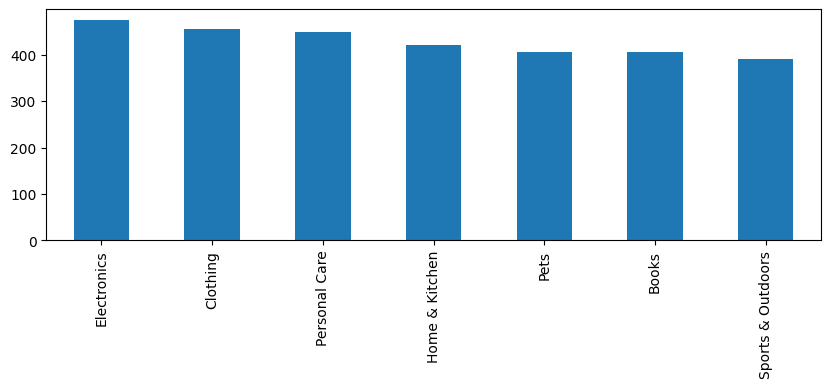

In [222]:
# count of product catalogs , different from quantity sum => khi mua những mặt hàng books, người ta thường mua nhiều hơn, nhưng số lượt mua lại kém hơn => phải tính tổng total profit mới xác định được sanrp hẩm nào bán chạy
product_catalog_count = fact_view[ColumnNames.ProductCatalogName].value_counts()
product_catalog_count.plot(kind='bar', figsize=(10, 3))

tổng doanh thu đơn hàng của quần áo cao nhất nhưng

<AxesSubplot: xlabel='ProductCatalogName'>

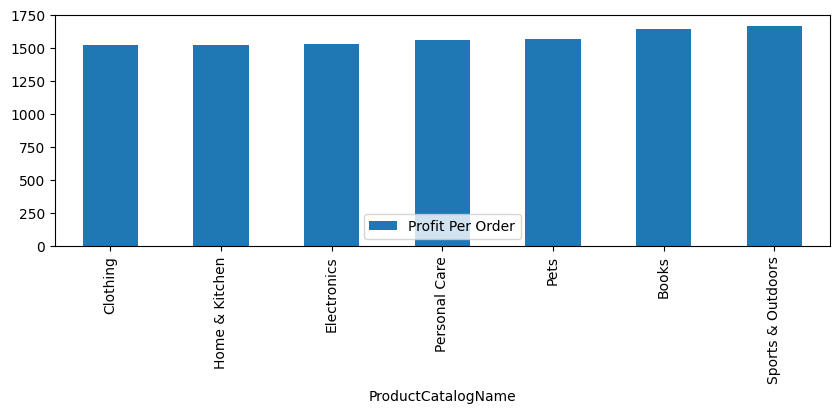

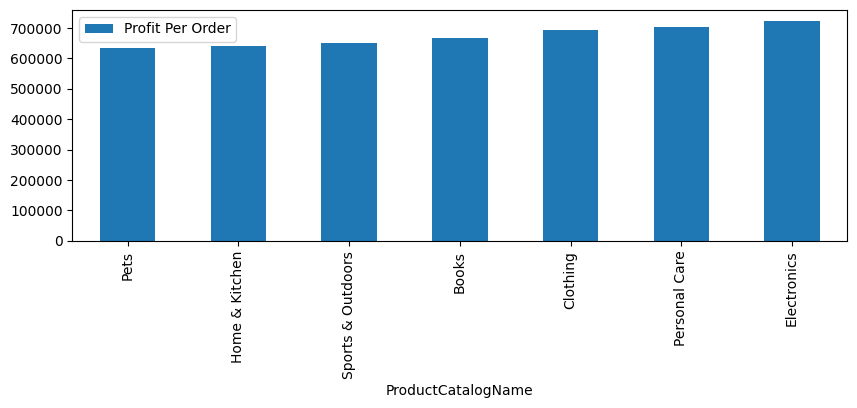

In [223]:
fact_view[ColumnNames.ProfitPerOrder] = fact_view[ColumnNames.ProfitPerUnit] * fact_view[ColumnNames.QuantityOrdered]
product_catalog_profit_order_mean = fact_view.groupby(ColumnNames.ProductCatalogName)[[ColumnNames.ProfitPerOrder]].mean()
product_catalog_profit_order_mean.sort_values(by=ColumnNames.ProfitPerOrder, ascending=True, inplace=True)
product_catalog_profit_order_mean.plot(kind='bar', figsize=(10, 3))

product_catalog_profit_order_sum = fact_view.groupby(ColumnNames.ProductCatalogName)[[ColumnNames.ProfitPerOrder]].sum()
product_catalog_profit_order_sum.sort_values(by=ColumnNames.ProfitPerOrder, ascending=True, inplace=True)
product_catalog_profit_order_sum.plot(kind='bar', figsize=(10, 3))

<AxesSubplot: xlabel='ProductCatalogName'>

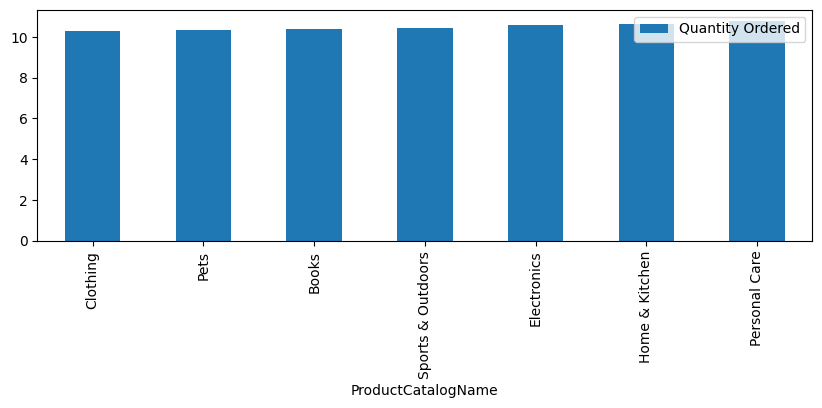

In [224]:
fact_view[ColumnNames.ProfitPerOrder] = fact_view[ColumnNames.ProfitPerUnit] * fact_view[ColumnNames.QuantityOrdered]
product_catalog_profit_order_mean = fact_view.groupby(ColumnNames.ProductCatalogName)[[ColumnNames.QuantityOrdered]].mean()
product_catalog_profit_order_mean.sort_values(by=ColumnNames.QuantityOrdered, ascending=True, inplace=True)
product_catalog_profit_order_mean.plot(kind='bar', figsize=(10, 3))

<AxesSubplot: xlabel='ProductCatalogName'>

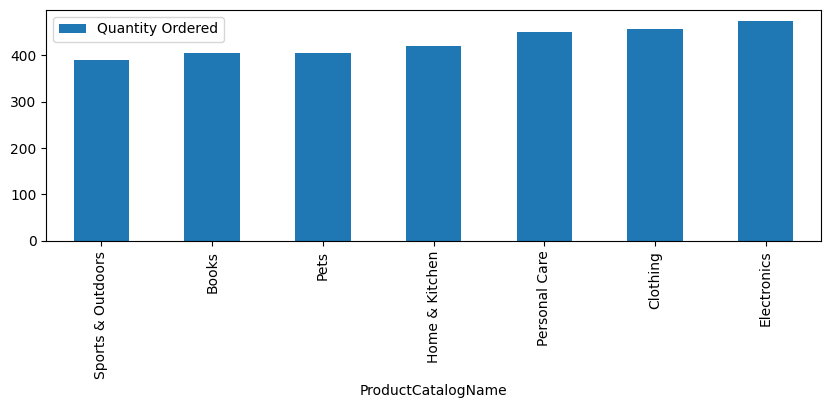

In [225]:
fact_view[ColumnNames.ProfitPerOrder] = fact_view[ColumnNames.ProfitPerUnit] * fact_view[ColumnNames.QuantityOrdered]
product_catalog_profit_order_mean = fact_view.groupby(ColumnNames.ProductCatalogName)[[ColumnNames.QuantityOrdered]].count()
product_catalog_profit_order_mean.sort_values(by=ColumnNames.QuantityOrdered, ascending=True, inplace=True)
product_catalog_profit_order_mean.plot(kind='bar', figsize=(10, 3))

#### Kiểm định trong nhóm sản phẩm clothing và pcare, số lượt cancelled vì unsatisfied và quality issue cao độc lập với số order của nhóm mặt hàng này cũng cao

In [ ]:
fact_buffer = fact_view.copy()
count_order_product_catalog_sr = fact_buffer[ColumnNames.ProductCatalogName].value_counts()
count_order_product_catalog_sr

# pivot table having idx is ProductCatalogName & ReturnReasonName, value is count of orderId
fact_buffer_canceled = fact_buffer[fact_buffer[ColumnNames.ReturnReasonName] != 'Dont have']
pivot_table_count_return_reason_for_each_catalog = pd.pivot_table(fact_buffer_canceled, values=ColumnNames.OrderID, index=[ColumnNames.ProductCatalogName, ColumnNames.ReturnReasonName], aggfunc='count')
pivot_table_count_return_reason_for_each_catalog



In [369]:
x = pivot_table_count_return_reason_for_each_catalog.join(count_order_product_catalog_sr, on=ColumnNames.ProductCatalogName, rsuffix='_total')
x.columns = ['CountReturnReason', 'OrderCountForCatalog']
x

CountReturnReason  \
ProductCatalogName ReturnReasonName                         
Books              Defective                            6   
                   Late Delivery                        8   
                   Quality Issue                        5   
                   Received Wrong Item                 10   
                   Unsatisfied                         10   
Clothing           Defective                            6   
                   Late Delivery                        8   
                   Quality Issue                        8   
                   Received Wrong Item                  8   
                   Unsatisfied                         12   
Electronics        Defective                            8   
                   Late Delivery                       10   
                   Quality Issue                        7   
                   Received Wrong Item                 11   
                   Unsatisfied                         12   
Home & Kitchen     Defective                           10   
                   Late Delivery                       14   
                   Quality Issue                        6   
                   Received Wrong Item                 13   
                   Unsatisfied                          6   
Personal Care      Defective                           12   
                   Late Delivery                        8   
                   Quality Issue                       12   
                   Received Wrong Item                 11   
                   Unsatisfied                         13   
Pets               Defective                           10   
                   Late Delivery                       10   
                   Quality Issue                        4   
                   Received Wrong Item                  7   
                   Unsatisfied                          6   
Sports & Outdoors  Defective                            7   
                   Late Delivery                        9   
                   Quality Issue                        2   
                   Received Wrong Item                 13   
                   Unsatisfied                          7   

                                        OrderCountForCatalog  
ProductCatalogName ReturnReasonName                           
Books              Defective                             405  
                   Late Delivery                         405  
                   Quality Issue                         405  
                   Received Wrong Item                   405  
                   Unsatisfied                           405  
Clothing           Defective                             456  
                   Late Delivery                         456  
                   Quality Issue                         456  
                   Received Wrong Item                   456  
                   Unsatisfied                           456  
Electronics        Defective                             474  
                   Late Delivery                         474  
                   Quality Issue                         474  
                   Received Wrong Item                   474  
                   Unsatisfied                           474  
Home & Kitchen     Defective                             420  
                   Late Delivery                         420  
                   Quality Issue                         420  
                   Received Wrong Item                   420  
                   Unsatisfied                           420  
Personal Care      Defective                             450  
                   Late Delivery                         450  
                   Quality Issue                         450  
                   Received Wrong Item                   450  
                   Unsatisfied                           450  
Pets               Defective                             405  
                  

In [374]:
# unpivot x from index
x = x.reset_index()
x = x[['CountReturnReason', 'OrderCountForCatalog']]
x

,CountReturnReason,OrderCountForCatalog
0,6,405
1,8,405
2,5,405
3,10,405
4,10,405
5,6,456
6,8,456
7,8,456
8,8,456
9,12,456


In [378]:
x.corr()

,CountReturnReason,OrderCountForCatalog
CountReturnReason,1.000000,0.296991
OrderCountForCatalog,0.296991,1.000000


In [377]:
model = ols('CountReturnReason ~ OrderCountForCatalog', data=x).fit() # 'X ~ C(Y)' <> 'X ~ Y' explain the difference between C(Y) and Y
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
model.summary()



                          sum_sq    df         F    PR(>F)
OrderCountForCatalog   24.606362   1.0  3.192301  0.083176
Residual              254.365067  33.0       NaN       NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CountReturnReason   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.192
Date:                Thu, 13 Jun 2024   Prob (F-statistic):             0.0832
Time:                        13:27:02   Log-Likelihood:                -84.373
No. Observations:                  35   AIC:                             172.7
Df Residuals:                      33   BIC:                             175.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.4993      6.916     -0.506      0.616     -17.569      10.571
OrderCountForCatalog     0.0288      0.016      1.787      0.083      -0.004       0.062
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.519
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.752
Skew:                           0.110   Prob(JB):                        0.687
Kurtosis:                       2.316   Cond. No.                     6.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ta thấy ngay nếu xét tất cả return reason, việc order count tăng đọc lập với số return reason count, coef chỉ bằng 0.0288
kết quả này có ý nghĩa thống kê với độ tin cậy 91%, cho thấy việc return reason tăng lên không phải do order count của các nhóm sản phẩm tăng, mà do nguyên nhân khác

Nhưng điều lạ là khi dùng ma trận tương quan, ta lại thấy hệ số tương quan là 0.3 (nhưng dẫu sao kết quả đó cũng ko đáng tin cậy)

#### Kiểm định nhóm sản phẩm clothing và pcare có số số lượt cancelled vì unsatisfied và quality issue cao hơn các nhóm khác là có ý nghĩa thống kê

<AxesSubplot: xlabel='ProductCatalogName'>

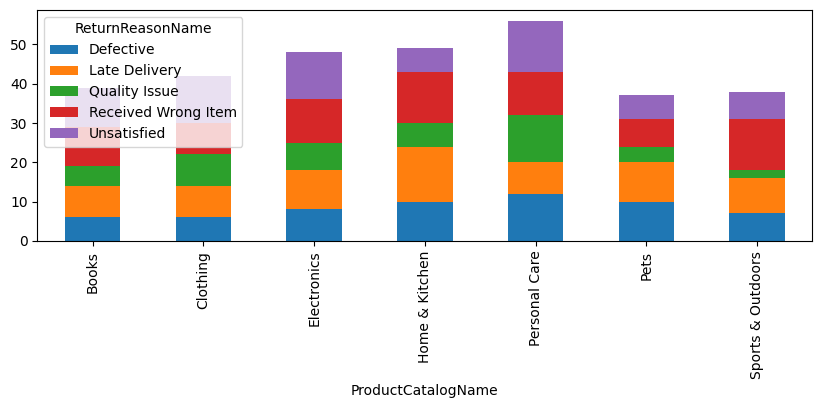

In [317]:
pivot_catalog_reason = pd.pivot_table(
    fact_view, 
    index=ColumnNames.ProductCatalogName, 
    columns=[ColumnNames.ReturnReasonName], 
    values=ColumnNames.OrderID,
    aggfunc='count'
)
pivot_catalog_reason
# remove Dont have Reason from the pivot table
pivot_catalog_reason.drop('Dont have', axis=1, inplace=True)
pivot_catalog_reason.plot(kind='bar', stacked=True, figsize=(10, 3))


kiểm định bằng chi-square không ra được kết quả

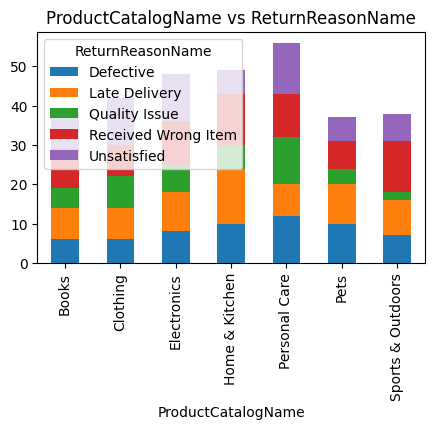

p-value: 0.7848014359172802
dof: 24
probability: 0.975, critical: 39.36407702660391, stat: 18.36798443713296
alpha (significant): 0.025000000000000022, p-value: 0.7848014359172802
ProductCatalogName independent ReturnReasonName(fail to reject H0)


In [321]:
fact_view_canceled_only = fact_view[fact_view[ColumnNames.OrderStatusName] == 'Cancelled']
plot_crosstab_and_show_dependency(fact_view_canceled_only, ColumnNames.ProductCatalogName, ColumnNames.ReturnReasonName, no_plot=False)

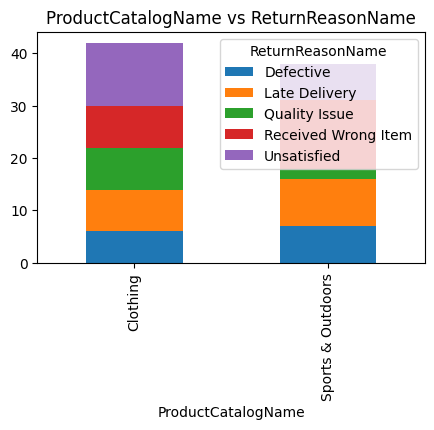

p-value: 0.1949203581559843
dof: 4
probability: 0.975, critical: 11.143286781877796, stat: 6.057155158391222
alpha (significant): 0.025000000000000022, p-value: 0.1949203581559843
ProductCatalogName independent ReturnReasonName(fail to reject H0)


In [326]:
fact_view_canceled_only = fact_view[fact_view[ColumnNames.OrderStatusName] == 'Cancelled']
fact_view_canceled_only_catalog_clothing_sport = fact_view_canceled_only[fact_view_canceled_only[ColumnNames.ProductCatalogName].isin(['Clothing', 'Sports & Outdoors'])]
plot_crosstab_and_show_dependency(fact_view_canceled_only_catalog_clothing_sport, ColumnNames.ProductCatalogName, ColumnNames.ReturnReasonName, no_plot=False)

Ta thấy ngay khi **so sánh chỉ 2 nhóm clothing và sport với outdoors**, tỉ trọng đơn bị unsatisfied thay đổi đáng kể và giờ có ý nghĩa thống kê với độ tin cậy 80%

ANOVA for ProductCatalogName and ReturnReasonNameNumber


C:\Users\PC\AppData\Local\Temp\ipykernel_28072\1561941663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_view_canceled_only['ReturnReasonNameNumber'] = fact_view_canceled_only[ColumnNames.ReturnReasonName].apply(lambda x: 1 if x == 'Unsatisfied' or x == 'Quality Issue' else 0)


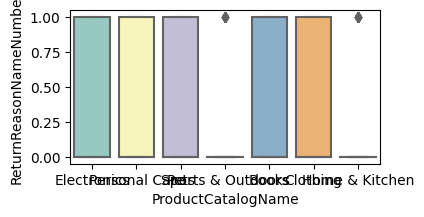

                          sum_sq     df         F    PR(>F)
C(ProductCatalogName)   2.589069    6.0  1.909333  0.079028
Residual               68.252355  302.0       NaN       NaN


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1           group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------
         Books          Clothing   0.0916 0.9772 -0.2222 0.4054  False
         Books       Electronics   0.0112    1.0  -0.293 0.3154  False
         Books    Home & Kitchen  -0.1397 0.8176 -0.4425 0.1631  False
         Books     Personal Care   0.0618  0.996 -0.2325 0.3561  False
         Books              Pets  -0.1143 0.9422 -0.4382 0.2095  False
         Books Sports & Outdoors  -0.1478 0.8206 -0.4694 0.1739  False
      Clothing       Electronics  -0.0804 0.9849 -0.3785 0.2178  False
      Clothing    Home & Kitchen  -0.2313 0.2408  -0.528 0.0654  False
      Clothing     Personal Care  -0.

In [325]:
fact_view_canceled_only = fact_view[fact_view[ColumnNames.OrderStatusName] == 'Cancelled']
fact_view_canceled_only['ReturnReasonNameNumber'] = fact_view_canceled_only[ColumnNames.ReturnReasonName].apply(lambda x: 1 if x == 'Unsatisfied' or x == 'Quality Issue' else 0)
anova_pairwise_tukeyhsd(fact_view_canceled_only, ColumnNames.ProductCatalogName, 'ReturnReasonNameNumber', no_plot=False)

Tất cả đều là false, nhưng đó là nếu xét với p value là 0.05, nếu ta chỉ xét p-value là khoảng 0.3, ta thấy giữa nhóm clothing với home & kitchen, sport & outdoors có đội tin cậy khoảng 75% thì có ý nghĩa thống kê với khoảng cách thường là 0.24 - 0.25 nếu xét các nhóm có return reason unsatisfied và quality là 1 và các nhóm còn lại là 0

tương tự với personal care với clothing, home & kietchen có mức chên khoảng 0.2, với độ tin cậy khoảng 65%, như vậy cũng đã khá cao nếu so với các nhóm còn lại và bối cảnh tập dữ liệu là dummy

#### Kiểm định số đơn đặt có bị ảnh hưởng bởi giá không, lợi nhuận 1 sản phẩm

In [ ]:
count_order_product_catalog = fact_view[ColumnNames.ProductCatalogName].value_counts()
print(count_order_product_catalog)

fact_view['OrderCountForProductCatalog'] = fact_view.groupby(ColumnNames.ProductCatalogName)[ColumnNames.OrderID].transform('count')
fact_view

count của order có hệ số tương quan với sale price và profit 1 unit thấp chỉ khoảng -0.02 => ta sẽ kiểm định 2 biến này dựa vào mô hình hồi quy, nếu kết quả có độ tin cậy cao => mối quan hệ giữa chúng là -0.02, cho thấy chúng không ảnh hưởng nhiều tới nhau và không gây biến thiên => count chỉ dựa hoàn toàn vào việc thị hiếu của khách (count nhóm sản phẩm đó cao có nghĩa nhóm sản phẩm đó đắt khách)

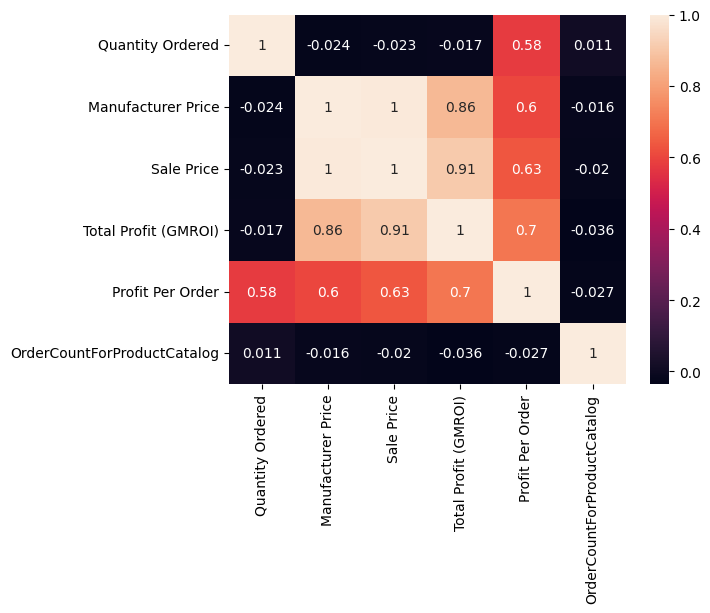

In [300]:
fact_view_correlation = fact_view[[ColumnNames.QuantityOrdered, ColumnNames.ManufacturerPrice, ColumnNames.SalePrice, ColumnNames.ProfitPerUnit, ColumnNames.ProfitPerOrder, 'OrderCountForProductCatalog']].corr()
sns.heatmap(fact_view_correlation, annot=True)
plt.show()

Kết quả kiểm định cho thấy số lượt mua và lợi nhuận 1 unit nhóm sản phẩm có ý nghĩa thống kê với hệ số coef thấp -0.01 => cho thấy việc chúng không có mối quan hệ (coef sấp xỉ 0) có độ tin cậy 95%

In [302]:
# prove that the quantity ordered is independent of the profit per unit using linear regression
fact_view_buff = fact_view.copy()
# fact_view_buff = fact_view_buff[fact_view_buff[ColumnNames.ProductCatalogName] == 'Books'] #comment this line to view for all product catalogs
fact_view_buff.rename(columns={ColumnNames.ProfitPerUnit: 'ProfitPerUnit', ColumnNames.SalePrice: 'SalePrice'}, inplace=True) #rename vi ols kho cho name co dau cach, ()
model = ols(f'OrderCountForProductCatalog ~ ProfitPerUnit', data=fact_view_buff).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# prove that the quantity ordered is independent of the profit per order using linear regression
model.summary()

                     sum_sq      df         F    PR(>F)
ProfitPerUnit  3.270754e+03     1.0  3.809558  0.051054
Residual       2.573978e+06  2998.0       NaN       NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     OrderCountForProductCatalog   R-squared:                       0.001
Model:                                     OLS   Adj. R-squared:                  0.001
Method:                          Least Squares   F-statistic:                     3.810
Date:                         Thu, 13 Jun 2024   Prob (F-statistic):             0.0511
Time:                                 10:18:38   Log-Likelihood:                -14389.
No. Observations:                         3000   AIC:                         2.878e+04
Df Residuals:                             2998   BIC:                         2.879e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       432.1235      0.966    447.408      0.000     430.230     434.017
ProfitPerUnit    -0.0104      0.005     -1.952      0.051      -0.021    4.78e-05
==============================================================================
Omnibus:                    20061.500   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.589
Skew:                           0.129   Prob(JB):                     2.63e-62
Kurtosis:                       1.516   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

kết quả kiểm định cho thấy giá của các nhóm sản phẩm không ảnh hưởng tới count của order hay sức mua (coef -0.001 cực kì thấp) và có độ tin cậy lên tới 97% và có ý nghĩa thống kê

In [303]:
# prove that the quantity ordered is independent of the profit per unit using linear regression
fact_view_buff = fact_view.copy()
# fact_view_buff = fact_view_buff[fact_view_buff[ColumnNames.ProductCatalogName] == 'Books'] #comment this line to view for all product catalogs
fact_view_buff.rename(columns={ColumnNames.ProfitPerUnit: 'ProfitPerUnit', ColumnNames.SalePrice: 'SalePrice'}, inplace=True) #rename vi ols kho cho name co dau cach, ()
model = ols(f'OrderCountForProductCatalog ~ SalePrice', data=fact_view_buff).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# prove that the quantity ordered is independent of the profit per order using linear regression
model.summary()

                 sum_sq      df         F    PR(>F)
SalePrice  1.066645e+03     1.0  1.241294  0.265311
Residual   2.576183e+06  2998.0       NaN       NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     OrderCountForProductCatalog   R-squared:                       0.000
Model:                                     OLS   Adj. R-squared:                  0.000
Method:                          Least Squares   F-statistic:                     1.241
Date:                         Thu, 13 Jun 2024   Prob (F-statistic):              0.265
Time:                                 10:20:36   Log-Likelihood:                -14390.
No. Observations:                         3000   AIC:                         2.878e+04
Df Residuals:                             2998   BIC:                         2.880e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    431.5897      1.073    402.345      0.000     429.486     433.693
SalePrice     -0.0011      0.001     -1.114      0.265      -0.003       0.001
==============================================================================
Omnibus:                    19937.030   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.249
Skew:                           0.129   Prob(JB):                     1.89e-62
Kurtosis:                       1.514   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Kiểm định

Số lượng hàng bán ra không tương quan với lợi nhuận, giá bán, giá sx

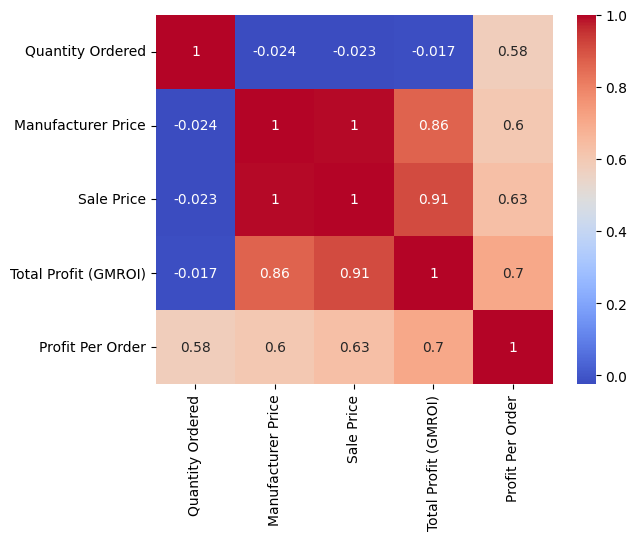

In [226]:
fact_view_correlation = fact_view[[ColumnNames.QuantityOrdered, ColumnNames.ManufacturerPrice, ColumnNames.SalePrice, ColumnNames.ProfitPerUnit, ColumnNames.ProfitPerOrder]].corr()
sns.heatmap(fact_view_correlation, annot=True, cmap='coolwarm')
plt.show()

In [227]:
# prove that the quantity ordered is independent of the profit per unit using linear regression
fact_view_buff = fact_view.copy()
fact_view_buff = fact_view_buff[fact_view_buff[ColumnNames.ProductCatalogName] == 'Books'] #comment this line to view for all product catalogs
fact_view_buff.rename(columns={ColumnNames.QuantityOrdered: 'QuantityOrdered', ColumnNames.ProfitPerUnit: 'ProfitPerUnit'}, inplace=True)
model = ols(f'QuantityOrdered ~ ProfitPerUnit', data=fact_view_buff).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# prove that the quantity ordered is independent of the profit per order using linear regression
model.summary()

                     sum_sq     df        F   PR(>F)
ProfitPerUnit      1.900836    1.0  0.05891  0.80835
Residual       13003.496694  403.0      NaN      NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        QuantityOrdered   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05891
Date:                Thu, 13 Jun 2024   Prob (F-statistic):              0.808
Time:                        08:51:53   Log-Likelihood:                -1277.2
No. Observations:                 405   AIC:                             2558.
Df Residuals:                     403   BIC:                             2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.5180      0.553     19.006      0.000       9.430      11.606
ProfitPerUnit    -0.0007      0.003     -0.243      0.808      -0.007       0.005
==============================================================================
Omnibus:                      205.804   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.624
Skew:                           0.067   Prob(JB):                     7.41e-06
Kurtosis:                       1.824   Cond. No.                         362.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Kết quả cho thấy ProfitPerUnit không ảnh hưởng tới QuantityOrder, điểm F đánh giá tổng quan mô hình hồi quy là 

In [228]:
# prove that the quantity ordered is independent of the profit per unit using linear regression
fact_view_buff = fact_view.copy()
# fact_view_buff = fact_view_buff[fact_view_buff[ColumnNames.ProductCatalogName] == 'Books'] #comment this line to view for all product catalogs
fact_view_buff.rename(columns={ColumnNames.QuantityOrdered: 'QuantityOrdered', ColumnNames.SalePrice: 'SalePrice'}, inplace=True)
model = ols(f'QuantityOrdered ~ SalePrice', data=fact_view_buff).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# prove that the quantity ordered is independent of the profit per order using linear regression
model.summary()

                  sum_sq      df         F    PR(>F)
SalePrice      55.203838     1.0  1.649522  0.199123
Residual   100332.762829  2998.0       NaN       NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        QuantityOrdered   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.650
Date:                Thu, 13 Jun 2024   Prob (F-statistic):              0.199
Time:                        08:51:53   Log-Likelihood:                -9521.6
No. Observations:                3000   AIC:                         1.905e+04
Df Residuals:                    2998   BIC:                         1.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7390      0.212     50.729      0.000      10.324      11.154
SalePrice     -0.0003      0.000     -1.284      0.199      -0.001       0.000
==============================================================================
Omnibus:                     2331.631   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.772
Skew:                          -0.005   Prob(JB):                     2.50e-39
Kurtosis:                       1.807   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

giá trị p-value của kiểm định mô hình hồi quy F là 0.1999 NHƯNG coef thấp -0.0003 => cho thấy SalePrice độc lập với Order Qty và nó có ý nghĩa thống kê với độ tin cậy 80%, trong tập dữ liệu này, ta chấp nhận độ tin cậy này

In [229]:
# prove that the quantity ordered is independent of the profit per unit using linear regression
fact_view_buff = fact_view.copy()
# fact_view_buff = fact_view_buff[fact_view_buff[ColumnNames.ProductCatalogName] == 'Books'] #comment this line to view for all product catalogs
fact_view_buff.rename(columns={ColumnNames.QuantityOrdered: 'QuantityOrdered', ColumnNames.ProfitPerOrder: 'ProfitPerOrder'}, inplace=True)
model = ols(f'ProfitPerOrder ~ QuantityOrdered', data=fact_view_buff).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# prove that the quantity ordered is independent of the profit per order using linear regression
model.summary()

                       sum_sq      df            F         PR(>F)
QuantityOrdered  2.221098e+09     1.0  1506.938603  1.958766e-267
Residual         4.418794e+09  2998.0          NaN            NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ProfitPerOrder   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     1507.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          1.96e-267
Time:                        08:51:53   Log-Likelihood:                -25561.
No. Observations:                3000   AIC:                         5.113e+04
Df Residuals:                    2998   BIC:                         5.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.0268     45.946      0.175      0.861     -82.062      98.116
QuantityOrdered   148.7452      3.832     38.819      0.000     141.232     156.258
==============================================================================
Omnibus:                      362.989   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.189
Skew:                           0.805   Prob(JB):                    4.33e-139
Kurtosis:                       4.583   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
# prove that the quantity ordered is independent of the profit per unit using linear regression
fact_view_buff = fact_view.copy()
# fact_view_buff = fact_view_buff[fact_view_buff[ColumnNames.ProductCatalogName] == 'Books'] #comment this line to view for all product catalogs
fact_view_buff.rename(columns={ColumnNames.QuantityOrdered: 'QuantityOrdered', ColumnNames.ManufacturerPrice: 'ManufacturerPrice'}, inplace=True)
model = ols(f'QuantityOrdered ~ ManufacturerPrice', data=fact_view_buff).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# prove that the quantity ordered is independent of the profit per order using linear regression
model.summary()

                          sum_sq      df         F   PR(>F)
ManufacturerPrice      59.748264     1.0  1.785393  0.18159
Residual           100328.218403  2998.0       NaN      NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        QuantityOrdered   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.785
Date:                Thu, 13 Jun 2024   Prob (F-statistic):              0.182
Time:                        08:51:53   Log-Likelihood:                -9521.6
No. Observations:                3000   AIC:                         1.905e+04
Df Residuals:                    2998   BIC:                         1.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.7498      0.213     50.571      0.000      10.333      11.167
ManufacturerPrice    -0.0003      0.000     -1.336      0.182      -0.001       0.000
==============================================================================
Omnibus:                     2329.422   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.739
Skew:                          -0.005   Prob(JB):                     2.54e-39
Kurtosis:                       1.808   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

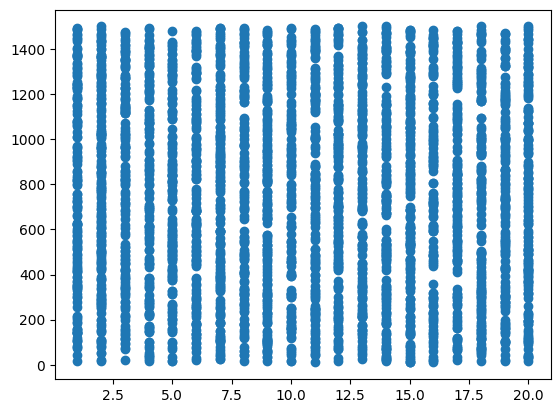

In [231]:
plt.scatter(fact_view[ColumnNames.QuantityOrdered], fact_view[ColumnNames.ManufacturerPrice])

giá sản xuất cũng không ảnh hưởng tới quantityOrdered, với độ tin cậy 82% và hệ số tương quan thấp -0.0003

,Quantity Ordered,Manufacturer Price
Quantity Ordered,1.000000,-0.024396
Manufacturer Price,-0.024396,1.000000


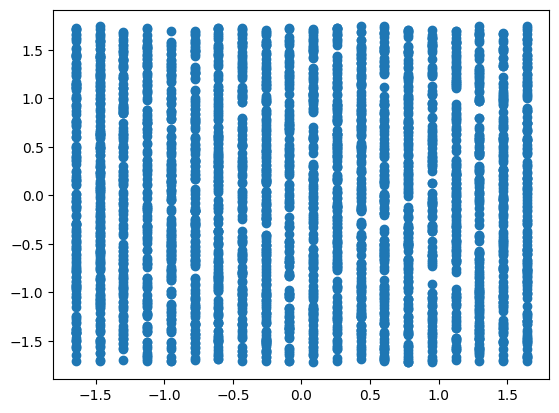

In [232]:
# normalize the quantity ordered and manufacturer price
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fact_view_scaled = fact_view.copy()
fact_view_scaled[[ColumnNames.QuantityOrdered, ColumnNames.ManufacturerPrice]] = scaler.fit_transform(fact_view_scaled[[ColumnNames.QuantityOrdered, ColumnNames.ManufacturerPrice]])
plt.scatter(fact_view_scaled[ColumnNames.QuantityOrdered], fact_view_scaled[ColumnNames.ManufacturerPrice])
fact_view_scaled[[ColumnNames.QuantityOrdered, ColumnNames.ManufacturerPrice]].corr()

Sau khi chuẩn hóa, hệ số tương quan cũng được cải thiện nhưng không đáng kể

In [233]:
fact_view[ColumnNames.ProductCatalogName].unique()

array(['Clothing', 'Home & Kitchen', 'Sports & Outdoors', 'Pets',
       'Electronics', 'Personal Care', 'Books'], dtype=object)

#### Predictive Time series

series nằm trong dải màu xanh, vậy nó không có ý nghĩa thống kê tại các điểm này

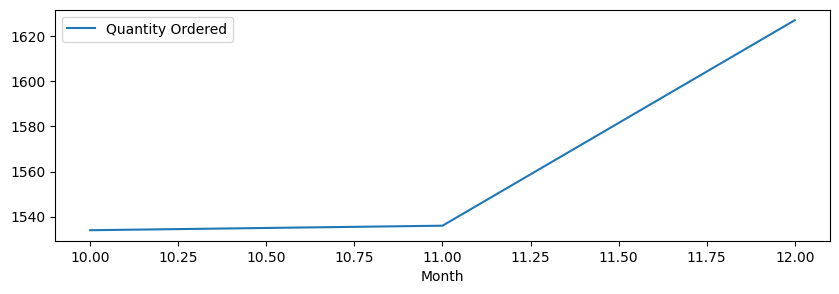

ADF Statistic: -11.280692
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Stationary


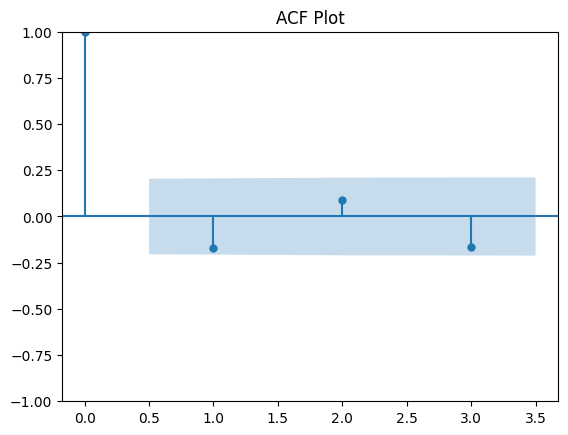

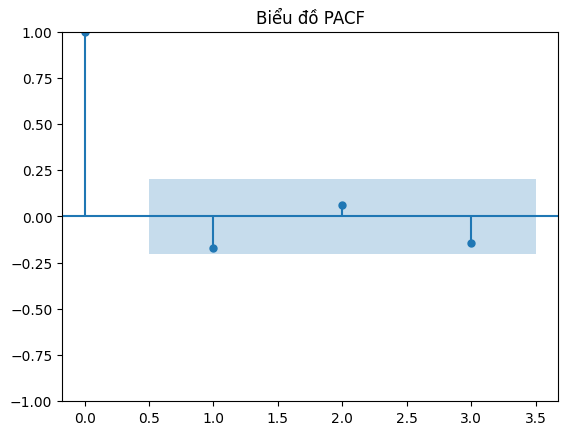

Next month quantity ordered: 1718.0000000000002
       Quantity Ordered
Month                  
10               1534.0
11               1536.0
12               1627.0
13               1718.0


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters excep

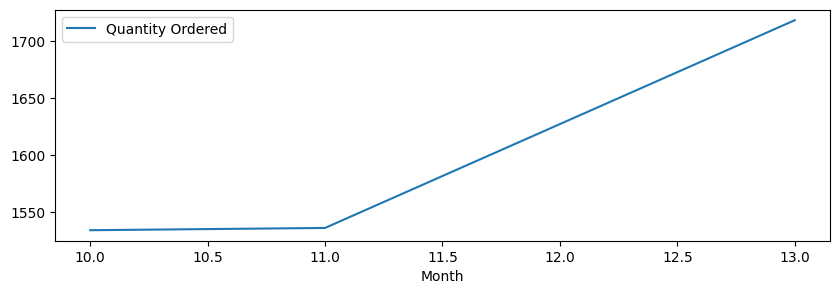

In [292]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# use sarimax to predict the sum of quantity ordered of product catalog 'Clothing'
fact_view_clothing = fact_view[fact_view[ColumnNames.ProductCatalogName] == 'Clothing']
fact_view_clothing_qty = fact_view_clothing.groupby(ColumnNames.Month)[[ColumnNames.QuantityOrdered]].sum()
fact_view_clothing_qty.plot(figsize=(10, 3))
plt.show()

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

sr_clothing_qty = fact_view_clothing.groupby(ColumnNames.Date)[[ColumnNames.QuantityOrdered]].sum()
sr_clothing_qty.index = pd.to_datetime(sr_clothing_qty.index)
check_stationarity(sr_clothing_qty) # the series is stationary , no need to difference => d = 0

from statsmodels.graphics.tsaplots import plot_acf
# điều chỉnh lag và kiểm tra ACF plot, để xem có ý nghĩa thống kê không
plot_acf(sr_clothing_qty, lags=3) # lag = 3, xét sau mỗi tháng với nhau ta thấy các thanh giảm đột ngột, nhưng không có ý nghĩa thống kê vì nằm trong khoảng tin cậy, nhưng vẫn có thể kết luận chúng là trạm
plt.title('ACF Plot')
plt.show()
# sau lag 3, ACF vẫn không rơi vào khoảng tin cậy (vẫn trong dải màu xanh), vậy Moving Average nên là 3 => q = 3

# PADF để tìm thông số p Autocorrection R, số cột lag trước đó sẽ cân nhắc để dự đoán của lag hiện tại
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(sr_clothing_qty, lags=3, method='ywm')  # Có thể chọn method như 'ywm' hoặc 'ols' cho kết quả mượt hơn
plt.title('Biểu đồ PACF')
plt.show() # sau lag 3, giảm đột ngột => nhưng không nằm ngoài khoảng tin cậy và có giá trị thông kê, tuy vậy, nó vẫn là tốt nhất => chọn p = 2 hoặc 3 là tốt

model = SARIMAX(fact_view_clothing_qty, order=(1,2,3), seasonal_order=(3, 2, 3, 6)) #=> nếu thay d từ 0 sang 2 ở cả order và seasonal_order để tăng tính trạm thì ta thấy qty tăng rõ ràng
model_fit = model.fit(disp=False)

model_fit.forecast(steps=1)
# fact_view_clothing_qty

# add month 1, quantity model fit return to the fact_view_clothing_qty series
predict_result = model_fit.forecast(steps=1)
next_month_qty = predict_result.values[0]
print(f'Next month quantity ordered: {next_month_qty}')
df_next_month = pd.DataFrame({ColumnNames.Month: [13], ColumnNames.QuantityOrdered: [next_month_qty]})
df_next_month.set_index(ColumnNames.Month, inplace=True)

fact_view_clothing_qty = pd.concat([fact_view_clothing_qty, df_next_month], axis=0)
fact_view_clothing_qty.plot(figsize=(10, 3))
print(fact_view_clothing_qty)

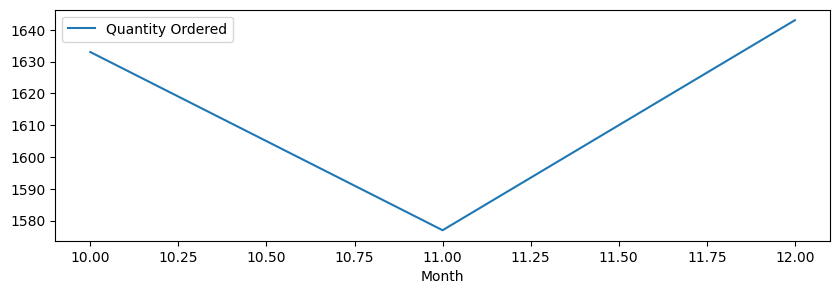

ADF Statistic: -11.280692
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Stationary


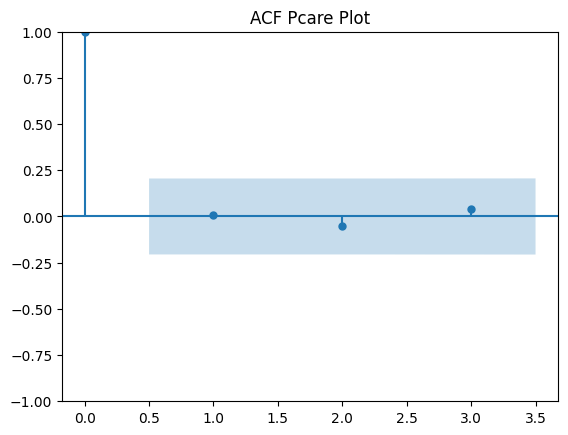

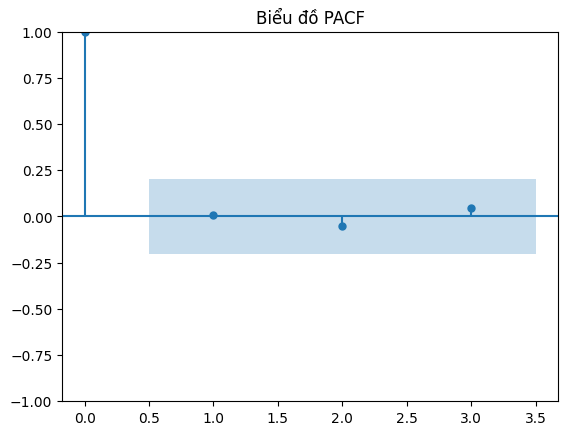

Next month quantity pcare ordered predict: 1708.9999999999998
       Quantity Ordered
Month                  
10               1633.0
11               1577.0
12               1643.0
13               1709.0


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters excep

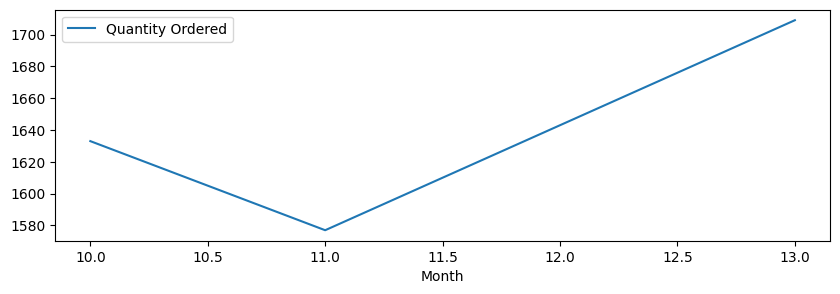

In [290]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# use sarimax to predict the sum of quantity ordered of product catalog 'Clothing'
fact_view_pcare = fact_view[fact_view[ColumnNames.ProductCatalogName] == 'Personal Care']
fact_view_pcare_qty = fact_view_pcare.groupby(ColumnNames.Month)[[ColumnNames.QuantityOrdered]].sum()
fact_view_pcare_qty.plot(figsize=(10, 3))
plt.show()

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

sr_pcare_qty = fact_view_pcare.groupby(ColumnNames.Date)[[ColumnNames.QuantityOrdered]].sum()
sr_pcare_qty.index = pd.to_datetime(sr_pcare_qty.index)
check_stationarity(sr_clothing_qty) # the series is stationary , no need to difference => d = 0

from statsmodels.graphics.tsaplots import plot_acf
# điều chỉnh lag và kiểm tra ACF plot, để xem có ý nghĩa thống kê không
plot_acf(sr_pcare_qty, lags=3) # lag = 3, xét sau mỗi tháng với nhau ta thấy các thanh giảm đột ngột, nhưng không có ý nghĩa thống kê vì nằm trong khoảng tin cậy, nhưng vẫn có thể kết luận chúng là trạm
plt.title('ACF Pcare Plot')
plt.show()
# sau lag 3, ACF vẫn không rơi vào khoảng tin cậy (vẫn trong dải màu xanh), vậy Moving Average nên là 3 => q = 3

# PADF để tìm thông số p Autocorrection R, số cột lag trước đó sẽ cân nhắc để dự đoán của lag hiện tại
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(sr_pcare_qty, lags=3, method='ywm')  # Có thể chọn method như 'ywm' hoặc 'ols' cho kết quả mượt hơn
plt.title('Biểu đồ PACF')
plt.show() # sau lag 3, giảm đột ngột => nhưng không nằm ngoài khoảng tin cậy và có giá trị thông kê, tuy vậy, nó vẫn là tốt nhất => chọn p = 2 hoặc 3 là tốt

model = SARIMAX(fact_view_pcare_qty, order=(1,2,1), seasonal_order=(1, 2, 1, 6)) # vì có 1 tháng giảm ở giữa => ta nên có d để tăng stationery (tính trạm cho chuối thời gian), p = 1 là dựa vào 1 tháng trước đó để dự đoán
model_fit = model.fit(disp=False)

model_fit.forecast(steps=1)
# fact_view_clothing_qty

# add month 1, quantity model fit return to the fact_view_clothing_qty series
predict_result = model_fit.forecast(steps=1)
next_month_qty = predict_result.values[0]
print(f'Next month quantity pcare ordered predict: {next_month_qty}')
df_next_month = pd.DataFrame({ColumnNames.Month: [13], ColumnNames.QuantityOrdered: [next_month_qty]})
df_next_month.set_index(ColumnNames.Month, inplace=True)

fact_view_pcare_qty = pd.concat([fact_view_pcare_qty, df_next_month], axis=0)
fact_view_pcare_qty.plot(figsize=(10, 3))
print(fact_view_pcare_qty)